<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [264]:
# Answer: 979 & 6

shape_movies = movies.shape
print('number of rows',shape_movies[0])
print('number of coumns',shape_movies[1])

number of rows 979
number of coumns 6


#### Check the data type of each column.

In [5]:
# Answer: 
print(movies.dtypes)


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


#### Calculate the average movie duration.

In [6]:
# Answer:  120.98
print(movies.describe())
print('average duration of the movies is ',round(movies["duration"].mean(),2))

       star_rating    duration
count   979.000000  979.000000
mean      7.889785  120.979571
std       0.336069   26.218010
min       7.400000   64.000000
25%       7.600000  102.000000
50%       7.800000  117.000000
75%       8.100000  134.000000
max       9.300000  242.000000
average duration of the movies is  120.98


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
# shortest duration movie title is  Freaks and is of duration  64  minutes.
# longest duration movie title is  Hamlet and is of duration  242  minutes.
sorted_movies = movies.sort_values(by=['duration'])
print('shortest duration movie title is ', sorted_movies.iloc[[0]]['title'].tolist()[0], 'and is of duration ', sorted_movies.iloc[[0]]['duration'].tolist()[0], ' minutes.')
print('longest duration movie title is ', sorted_movies.iloc[[-1]]['title'].tolist()[0], 'and is of duration ', sorted_movies.iloc[[-1]]['duration'].tolist()[0], ' minutes.')

shortest duration movie title is  Freaks and is of duration  64  minutes.
longest duration movie title is  Hamlet and is of duration  242  minutes.


#### Create a histogram of duration, choosing an "appropriate" number of bins.

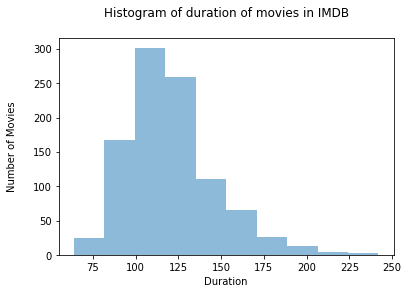

In [8]:
# Answer: 
n_bins = 10
n, bins, patches = plt.hist(movies.duration, n_bins, alpha=0.5, stacked= True)

plt.xlabel('Duration\n')
plt.ylabel('Number of Movies\n')
plt.title('Histogram of duration of movies in IMDB\n')
plt.show()


#### Use a box plot to display that same data.

Text(0.5, 1.0, 'Boxplot of duration of movies in IMDB\n')

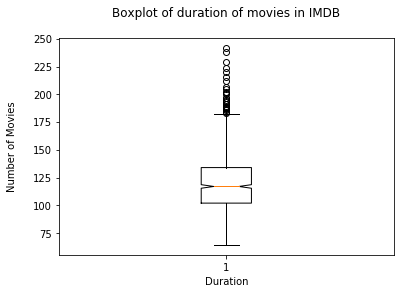

In [9]:
# Answer:

plt.boxplot(movies.duration, notch=True, meanline = True)
plt.xlabel('Duration\n')
plt.ylabel('Number of Movies\n')
plt.title('Boxplot of duration of movies in IMDB\n')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [265]:
# Answer:


print(movies.content_rating.value_counts())




R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Movies having content ratings\n')

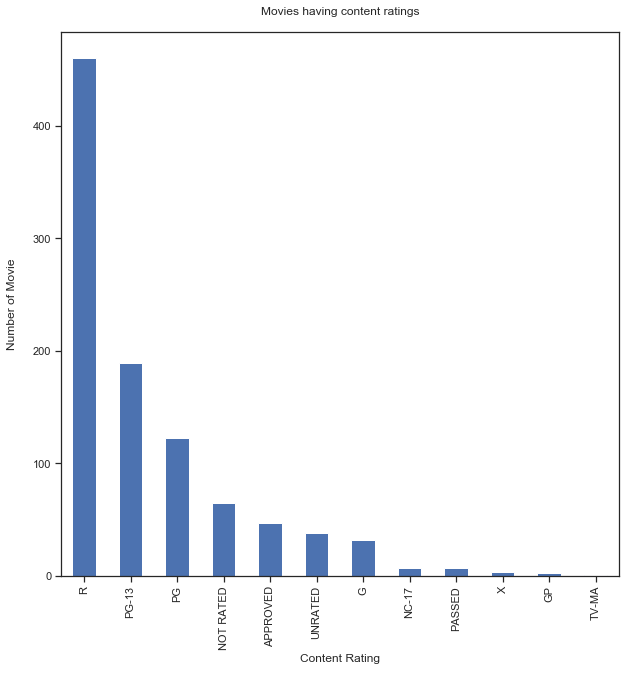

In [20]:
# Answer:


movies.content_rating.value_counts().plot(kind='bar', figsize=(10,10))  
plt.xlabel('Content Rating\n');
plt.ylabel('Number of Movie\n');
plt.title('Movies having content ratings\n')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [40]:
# Answer:
print(movies.shape)
mask = (movies['content_rating'] == "Not RATED") | (movies['content_rating'] == "APPROVED") | (movies['content_rating'] == "PASSED") | (movies['content_rating'] == "GP")
movies.content_rating.replace("NOT RATED", "UNRATED", inplace=True)
movies.content_rating.replace("APPROVED", "UNRATED", inplace=True)
movies.content_rating.replace("PASSED", "UNRATED", inplace=True)
movies.content_rating.replace("GP", "UNRATED", inplace=True)
movies.content_rating.value_counts()


(979, 6)


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [41]:
# Answer:
movies.content_rating.replace("X", "NC-17", inplace=True)
movies.content_rating.replace("TV-MA", "NC-17", inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [50]:
# Answer:

for movie in movies.columns:
    print('Null values in columns '+movie+ " are",movies[movie].isnull().sum())

Null values in columns star_rating are 0
Null values in columns title are 0
Null values in columns content_rating are 3
Null values in columns genre are 0
Null values in columns duration are 0
Null values in columns actors_list are 0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [52]:
# Answer:
movies.content_rating.fillna('UNRATED', inplace= True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [59]:
# Answer:
print('duration for more than 2 hours ',movies[movies.duration>=120].star_rating.mean())
print('duration for less than 2 hours ',movies[movies.duration<120].star_rating.mean())

#observation : Average rating is slightly higher for movies which are 2 hour and  longer.

duration for more than 2 hours  7.948898678414082
duration for less than 2 hours  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

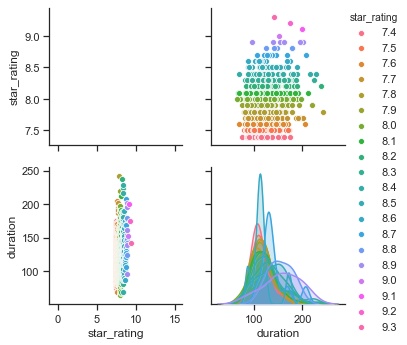

In [69]:
# Answer:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies,hue="star_rating",  palette="husl")
#there is no strong relation between the two

#### Calculate the average duration for each genre.

In [72]:
# Answer:
content_rating_movies = movies[["duration", "genre"]].groupby(['genre']).mean()
# movies[['content_rating', 'title']].groupby(['content_rating']).count()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

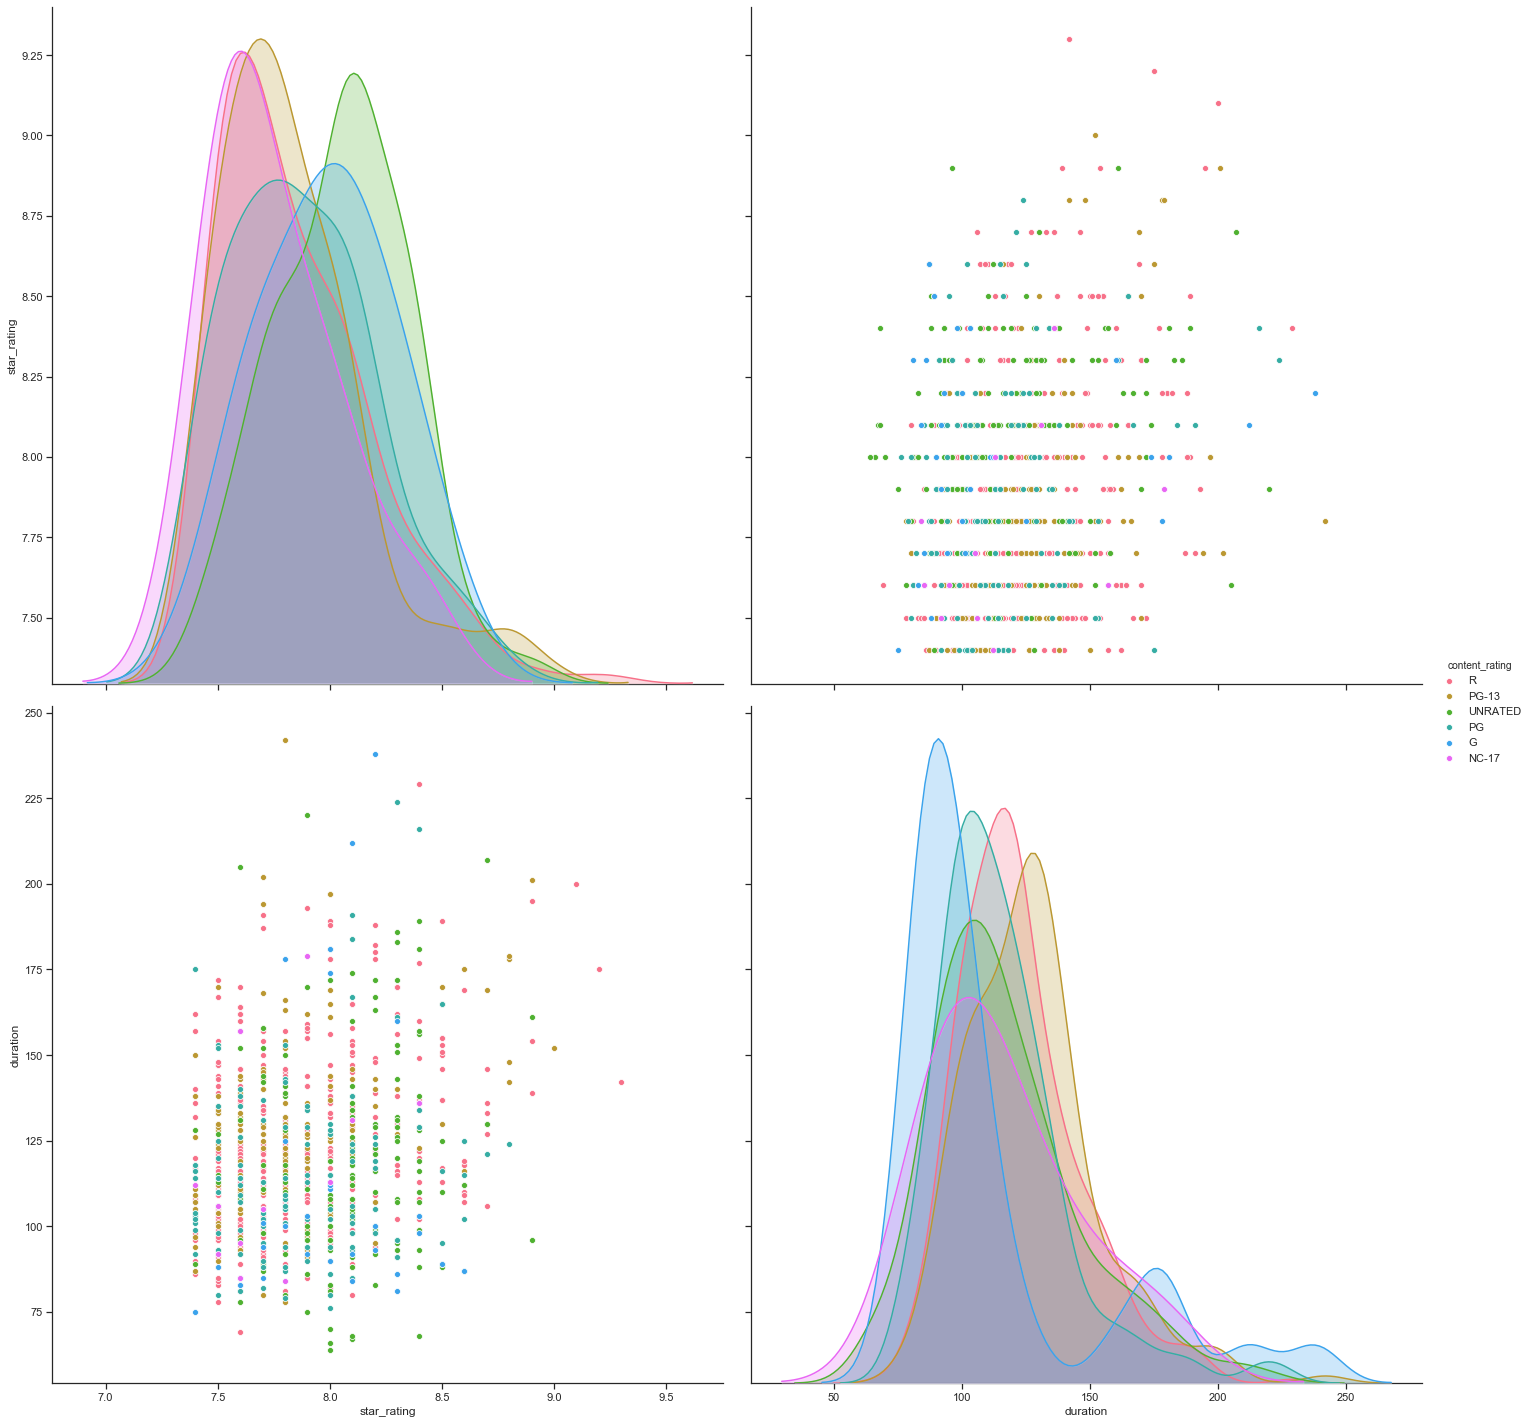

In [76]:
# Answer:
sns.pairplot(movies, hue="content_rating",  palette="husl",size = 10)

#### Determine the top rated movie (by star rating) for each genre.

In [131]:
# Answer:
# top_movie = movies.groupby(['genre','star_rating','title']).count().reset_index()
# print(top_movie.sort_values('star_rating', ascending=False))

# grouped = df.groupby('mygroups').sum().reset_index()
# grouped.sort_values('mygroups', ascending=False)
# ,'star_rating','title

genre_group = movies.groupby(['genre'], sort=False)
top_rated_movies= genre_group.max().reset_index()
print(top_rated_movies[['genre','star_rating','title']])


        genre  star_rating                                title
0       Crime          9.3                               Zodiac
1      Action          9.0                              Yojimbo
2       Drama          8.9                                 Zulu
3     Western          8.9                           Unforgiven
4   Adventure          8.9                            True Grit
5   Biography          8.9                        Walk the Line
6      Comedy          8.6                           Zombieland
7   Animation          8.6                       Wreck-It Ralph
8     Mystery          8.6                              Vertigo
9      Horror          8.6                                [Rec]
10  Film-Noir          8.3                        The Third Man
11     Sci-Fi          8.2        The Day the Earth Stood Still
12    History          8.0                  Battleship Potemkin
13   Thriller          8.0            The Man Who Knew Too Much
14     Family          7.9  Willy Wonka 

In [145]:
# Answer:
#following are duplicatd names for a movie

print('duplicated_movies \n',movies[movies.duplicated(['title'])])

#if they are actully duplicated : empty DF | no duplicated movies
print('duplicated records in imdb database \n',movies[movies.duplicated()])

duplicated_movies 
      star_rating                            title content_rating      genre  \
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit        UNRATED  Adventure   

     duration                                        actors_list  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
905       128  [u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...  
924       134  [u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...  
936       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  
duplicated records in imdb database 
 Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [209]:
# Answer:


list_genre = movies.groupby('genre')['star_rating'].count().reset_index()
list_genres  = list_genre[list_genre['star_rating']>10]['genre']
print(list_genres)
selected_genres_movies = movies[movies.genre.isin(list_genres)]
print(selected_genres_movies)

selected_genres_movies.groupby('genre')['star_rating'].mean().reset_index()


        genre  star_rating
0      Action          136
1   Adventure           75
2   Animation           62
3   Biography           77
4      Comedy          156
5       Crime          124
6       Drama          278
7      Family            2
8     Fantasy            1
9   Film-Noir            3
10    History            1
11     Horror           29
12    Mystery           16
13     Sci-Fi            5
14   Thriller            5
15    Western            9
0        Action
1     Adventure
2     Animation
3     Biography
4        Comedy
5         Crime
6         Drama
11       Horror
12      Mystery
Name: genre, dtype: object
     star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9         

,genre,star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Horror,7.806897
8,Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [242]:
# Answer:


df_movies = movies[['star_rating', 'genre']].groupby('genre').count().reset_index()
list_genre = df_movies[df_movies['star_rating']>10]['genre']
selected_genres_movies = movies[movies.genre.isin(list_genre)]
selected_genres_movies.groupby('genre')['star_rating'].mean().reset_index()

,genre,star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Horror,7.806897
8,Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [250]:
# Answer:
df_movies = movies[['star_rating', 'genre']].groupby('genre').count().reset_index()
list_genre = df_movies[df_movies['star_rating']>10]['genre']

movies__mean_genre = movies.groupby('genre').mean().reset_index()
movies__mean_genre[movies__mean_genre.genre.isin(list_genre)]

,genre,star_rating,duration
0,Action,7.884559,126.485294
1,Adventure,7.933333,134.840000
2,Animation,7.914516,96.596774
3,Biography,7.862338,131.844156
4,Comedy,7.822436,107.602564
5,Crime,7.916935,122.298387
6,Drama,7.902518,126.539568
11,Horror,7.806897,102.517241
12,Mystery,7.975000,115.625000


#### Option 4: aggregate by count and mean, then filter using the count

In [263]:
# Answer:
unique_movies_df = movies.groupby('genre').agg(["mean", "count"]).reset_index()
# unique_movies_df
unique_movies_df[unique_movies_df['star_rating']['count']>10]

genre star_rating          duration      
                     mean count        mean count
0      Action    7.884559   136  126.485294   136
1   Adventure    7.933333    75  134.840000    75
2   Animation    7.914516    62   96.596774    62
3   Biography    7.862338    77  131.844156    77
4      Comedy    7.822436   156  107.602564   156
5       Crime    7.916935   124  122.298387   124
6       Drama    7.902518   278  126.539568   278
11     Horror    7.806897    29  102.517241    29
12    Mystery    7.975000    16  115.625000    16

## Bonus

#### Figure out something "interesting" using the actors data!